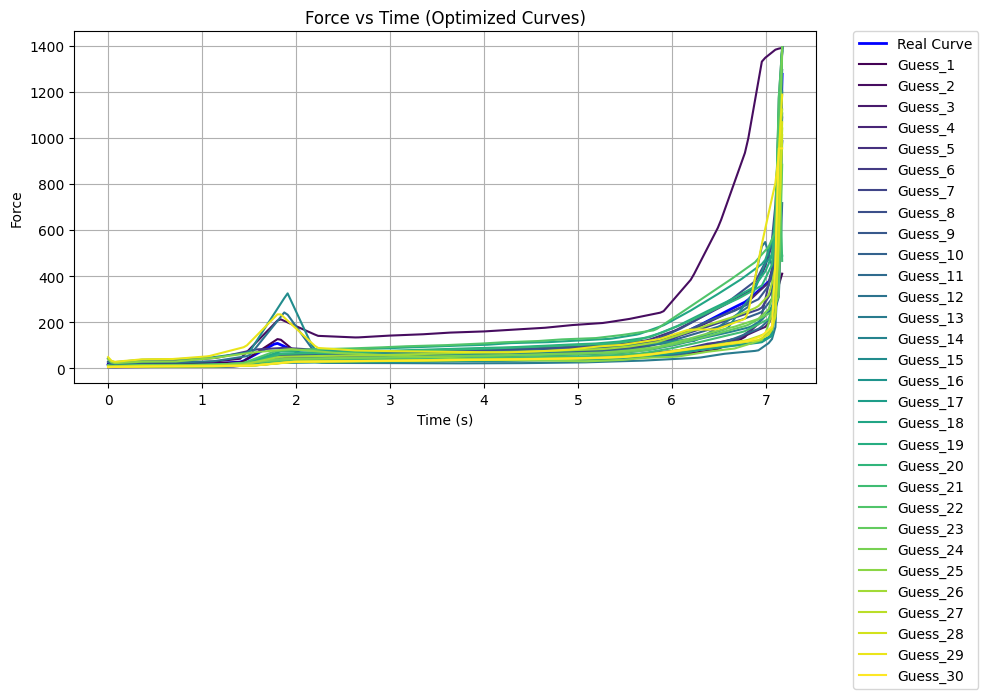

In [ ]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load pickled data
with open("guess_data_all.pkl", "rb") as f:
    guess_data_all = pickle.load(f)

with open("guess_data_all_optim.pkl", "rb") as f:
    guess_data_all_optim = pickle.load(f)


area_data = np.load("area_data.npy").tolist()
valid_xml = np.load("valid_xml.npy").tolist()


train_df = pd.read_csv("train_data.csv")
best_df = pd.read_csv("best_params.csv")

curves = np.load("resampled_curves.npz")
common_time = curves["common_time"]
real_force_resampled = curves["real_force_resampled"]

# Plot
num_curves = len(guess_data_all_optim)
plt.figure(figsize=(10, 6))


plt.plot(common_time, real_force_resampled, 'b-', label='Real Curve', linewidth=2)


if num_curves > 0:
    colormap = plt.get_cmap('viridis', num_curves)
    for i, (key, guess_data) in enumerate(guess_data_all_optim.items()):
        
        guess_data_array = np.array([(float(x), float(y)) for x, y in guess_data])
        guess_time = guess_data_array[:, 0]
        guess_force = guess_data_array[:, 1] * 9.80665  

        guess_force_resampled = np.interp(common_time, guess_time, guess_force)
        plt.plot(common_time, guess_force_resampled, color=colormap(i), label=f'Guess_{i+1}')

plt.xlabel('Time (s)')
plt.ylabel('Force')  
plt.title('Force vs Time (Optimized Curves)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()


In [8]:
print(train_df)

           n     tau_star     tau_w         m        neg_MSE
0   0.679588  2494.057407  0.236092  1.401925   -2572.071329
1   0.288684  4014.350365  0.995536  1.144933   -3807.614176
2   0.718055  5143.532925  0.156767  1.021928  -75947.080909
3   0.776807  6575.737029  0.324563  1.225817  -24441.506608
4   0.320331  4329.935307  0.869578  1.733966   -4154.282199
5   0.564374  7178.171904  0.366447  1.800743  -55042.306678
6   0.387828  3433.690237  0.613293  1.852647   -2581.047056
7   0.628657  6979.304084  0.838361  1.292897 -174467.369461
8   0.456419  1847.741458  0.712093  1.544591   -1394.989655
9   0.434758  6117.423321  0.541123  1.606259  -10543.708070
10  0.558887  7871.785296  0.485383  1.666910  -90606.585457
11  0.721487  3277.638996  0.461866  1.524054  -52891.865500
12  0.231946  2364.555312  0.753776  1.082775   -9283.053089
13  0.518916  5261.037358  0.084489  1.324787   -7213.807089
14  0.251477  1459.519087  0.033773  1.445890  -11185.939295
15  0.624310  1310.87450

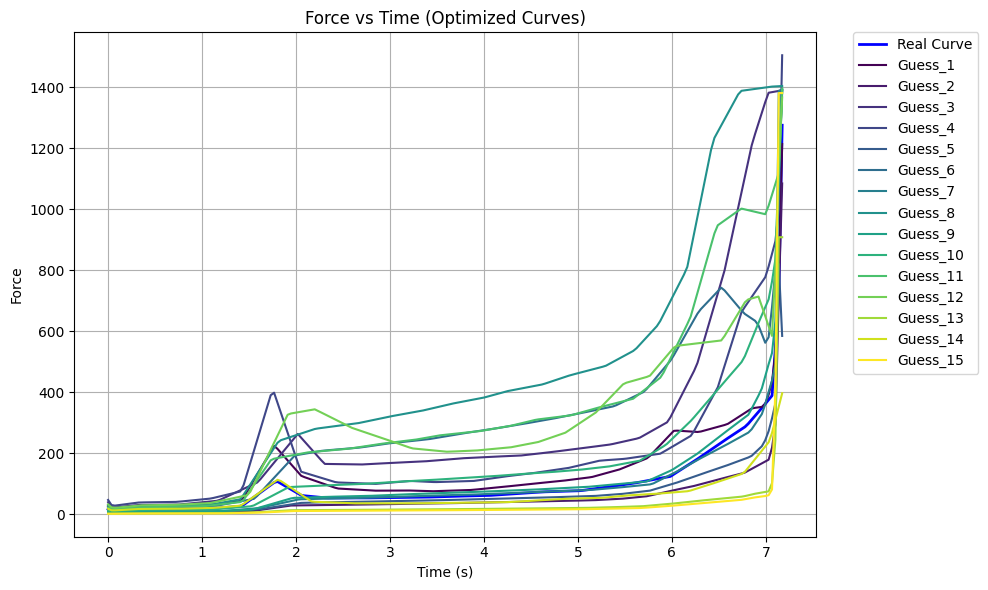

In [ ]:
num_curves = len(guess_data_all)
plt.figure(figsize=(10, 6))


plt.plot(common_time, real_force_resampled, 'b-', label='Real Curve', linewidth=2)


if num_curves > 0:
    colormap = plt.get_cmap('viridis', num_curves)
    for i, (key, guess_data) in enumerate(guess_data_all.items()):
        
        guess_data_array = np.array([(float(x), float(y)) for x, y in guess_data])
        guess_time = guess_data_array[:, 0]
        guess_force = guess_data_array[:, 1] * 9.80665  

        guess_force_resampled = np.interp(common_time, guess_time, guess_force)
        plt.plot(common_time, guess_force_resampled, color=colormap(i), label=f'Guess_{i+1}')

plt.xlabel('Time (s)')
plt.ylabel('Force')  
plt.title('Force vs Time (Guess Curves)')
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.tight_layout()
plt.show()
